In [1]:
import tensorflow as tf
import numpy as np
from numpy import genfromtxt
from sklearn import preprocessing
raw_data = genfromtxt('1800_recent.csv', delimiter=',', skip_header=1)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
normalized_x = preprocessing.normalize(raw_data,axis=0)

In [3]:
# print(normalized_x[0])
# print(raw_data[0])
# print(normalized_x[-1])
# print(raw_data[-1])
# print(normalized_x[-2])
# print(raw_data[-2])

In [4]:
# raw_data= raw_data[:,:4]
# normalized_x = raw_data

In [5]:
seq_length = 7
data_dim=6
hidden=10
batch_size=1
output_dim=1
learning_rate=0.01
iterations = 5000

In [6]:
xy = normalized_x
data_x = xy
data_y = xy[:,[3]]

train_size = int(len(data_y)*0.7)
test_size = len(data_y)-train_size

dataX=[]
dataY=[]

for i in range(0,len(data_y)-seq_length):
    _x = data_x[i:i+seq_length]
    _y = data_y[i+seq_length]
#     print(_x, "=> ",_y)
    dataX.append(_x)
    dataY.append(_y)



In [7]:
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden, state_is_tuple=True, activation=tf.tanh)
cell = tf.contrib.rnn.GRUCell(num_units=hidden, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [8]:
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1], output_dim, activation_fn=None)

In [9]:
loss = tf.reduce_sum(tf.square(Y_pred- Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [10]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [11]:
for i in range(iterations):
    _,step_loss = sess.run([train,loss], feed_dict={X:trainX, Y:trainY})
    
    if i%100 == 0:
        print(i, "loss : ",step_loss)

0 loss :  0.110291
100 loss :  0.00550549
200 loss :  0.000786774
300 loss :  9.20545e-05
400 loss :  4.54587e-05
500 loss :  3.61248e-05
600 loss :  3.00554e-05
700 loss :  2.57006e-05
800 loss :  2.26724e-05
900 loss :  2.06132e-05
1000 loss :  1.92151e-05
1100 loss :  1.82439e-05
1200 loss :  1.75387e-05
1300 loss :  1.69969e-05
1400 loss :  1.65578e-05
1500 loss :  1.61872e-05
1600 loss :  1.5866e-05
1700 loss :  1.55836e-05
1800 loss :  1.53333e-05
1900 loss :  1.51107e-05
2000 loss :  1.49121e-05
2100 loss :  1.47349e-05
2200 loss :  1.45766e-05
2300 loss :  1.4435e-05
2400 loss :  1.43085e-05
2500 loss :  1.41953e-05
2600 loss :  1.40941e-05
2700 loss :  1.40037e-05
2800 loss :  1.39231e-05
2900 loss :  0.000169923
3000 loss :  1.29959e-05
3100 loss :  1.28862e-05
3200 loss :  1.28312e-05
3300 loss :  1.27915e-05
3400 loss :  0.0811747
3500 loss :  1.3032e-05
3600 loss :  1.24931e-05
3700 loss :  1.23417e-05
3800 loss :  1.22747e-05
3900 loss :  1.22337e-05
4000 loss :  0.002705

In [12]:
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets- predictions)))

In [13]:
test_prediction = sess.run(Y_pred, feed_dict={X:testX})
rmse_val = sess.run(rmse, feed_dict={targets:testY, predictions:test_prediction})

In [14]:
print("rmse :", rmse_val)

rmse : 0.000434807


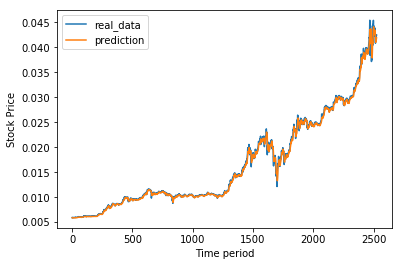

In [15]:
 plt.plot(testY, label='real_data')
plt.plot(test_prediction, label='prediction')
plt.legend()
plt.xlabel("Time period")
plt.ylabel("Stock Price")
plt.show()

In [16]:
# testX.shape
y = sess.run(Y_pred, feed_dict={X:testX})
print(y[-2])
print(testY[-2])


[ 0.04173008]
[ 0.04251934]
